# Módulo  - Estatística II

## Projeto - Análise do dataset "Wine Quality"

### Instruções

- O projeto deverá ser entregue até dia 05/05;
- O projeto poderá ser feito __individualmente__ ou em __grupos__ de até __4 pessoas__;

### Informações sobre o projeto

Dataset (conjunto de dados a ser utilizado) está disponível em:
    https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


Attribute Information:

Input variables (based on physicochemical tests): <br>
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data): <br>
- 12 - quality (score between 0 and 10)

Para ajudar no desenvolvimento do projeto, vamos separar o projeto em algumas seções, conforme descritas a seguir:

- __Preparação dos Dados e Verificação de Consistência__: Neste tópico deve ser feita a verificação da consistência dos dados e caso necessário efetuar eventuais modificações na base de dados. Alguns dos procedimentos que podemos fazer aqui são: Remoção e/ou tratamento de valores faltantes, remoção de duplicatas, ajustes dos tipos de variáveis, análise de _outliers_ entre outras;

<br>

- __Análise Exploratória dos Dados__: Para fazermos a modelagem, precisamos conhecer muito bem os dados que estamos trabalhando. Por isso, nesta parte do projeto vocês desenvolveram an´laises e gráficos a respeito dos dados que estão utilizando. Tente tirar ao máximo informaç~eos sobre as variáveis em si e suas relações com as demais;

<br>

- __Modelagem dos Dados__: Nesta parte, o projeto será dividido em dois modelos, um de Regressão Linear e outra de Regressão Logística. No __primeiro módulo__, o objetivo será modelar um regressor que estime o valor da qualidade do vinho (para este primeiro modelo, desconsidere a variável `quality`). No __segundo modelo__, utilizando como variável resposta (_target_) a variável `quality`, modelar um classificador que separe entre vinhos bons e ruins (para isto, considere `quality` >= 6 como um vinho bom). Além disso, avaliar a necessidade ou não de aplicar regularizações no modelo.

<br>

- __Conclusões sobre o Projeto__: Para finalizar, descreva as suas conclusões sobre o desenvolvimento do modelo e os resultados obtidos.

<br>

__Importante:__ Façam as análise em ambas as bases `winequality-red.csv` e `winequality-white.csv` separadamente, e depois misturem os dados para uma nova análise (no total serão 3 análises a serem feitas).

<br>

A entrega deve ser feita em um arquivo _Jupyter Notebook_ em aba que será disponibilizada no Class, contendo todo o desenvolvimento do projeto e o nome(s) do(s) aluno(s).

Olhando para os dados:

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score

# import warnings filter
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

In [90]:
# Abrindo os datasets para análise
red = pd.read_csv('../datasets/winequality-red.csv', sep=';')
white = pd.read_csv('../datasets/winequality-white.csv', sep=';')

# Vinho Tinto


In [91]:
# Conhecendo o dataset
red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [92]:
# Analisando as informações do dataset
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## OBS: Verifica-se que o dataset não contém dados nulos

In [93]:
# Retirando dados duplicados do dataset
Red = red.drop_duplicates()

In [94]:
#Verificando as métricas do dataset
Red.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     5.623252  
std       0.155036     0.170667     1.082065     0.823578  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

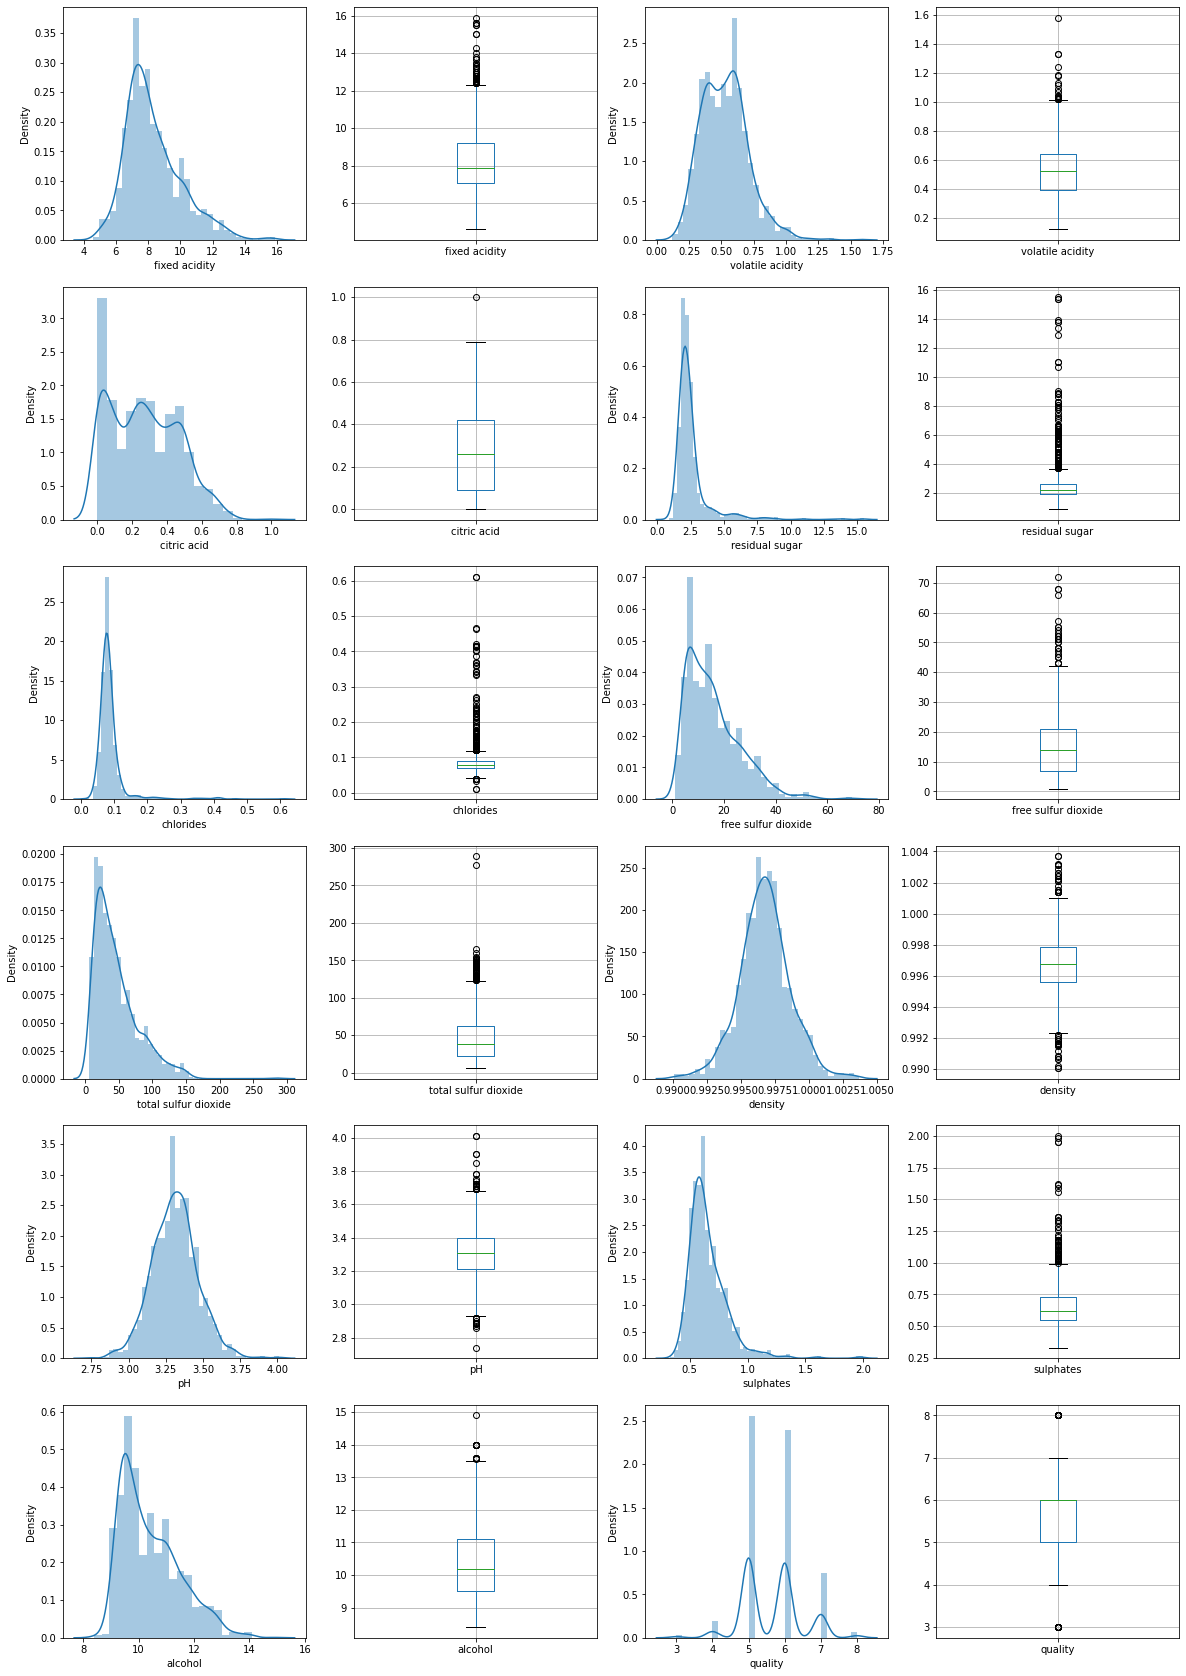

In [95]:
#Gerando grafico com loop para visualizar o impacto de outliers ea curva pela densidade.

fig, ax = plt.subplots(6, 4, figsize=(20, 30))
ax = ax.flatten()
columns = red.columns

for i, col in enumerate(columns):
    sns.distplot(red[col], ax=ax[i+i])
    red.boxplot(col, ax=ax[i+1+i])
    #print()
plt.show()

<AxesSubplot:xlabel='quality', ylabel='count'>

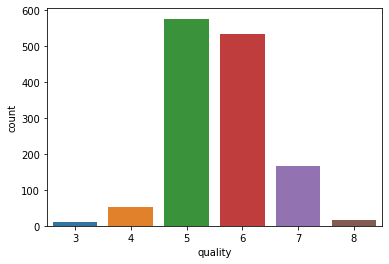

In [96]:
# visualizando graficamente a coluna 'quality'
sns.countplot(x='quality', data = Red)

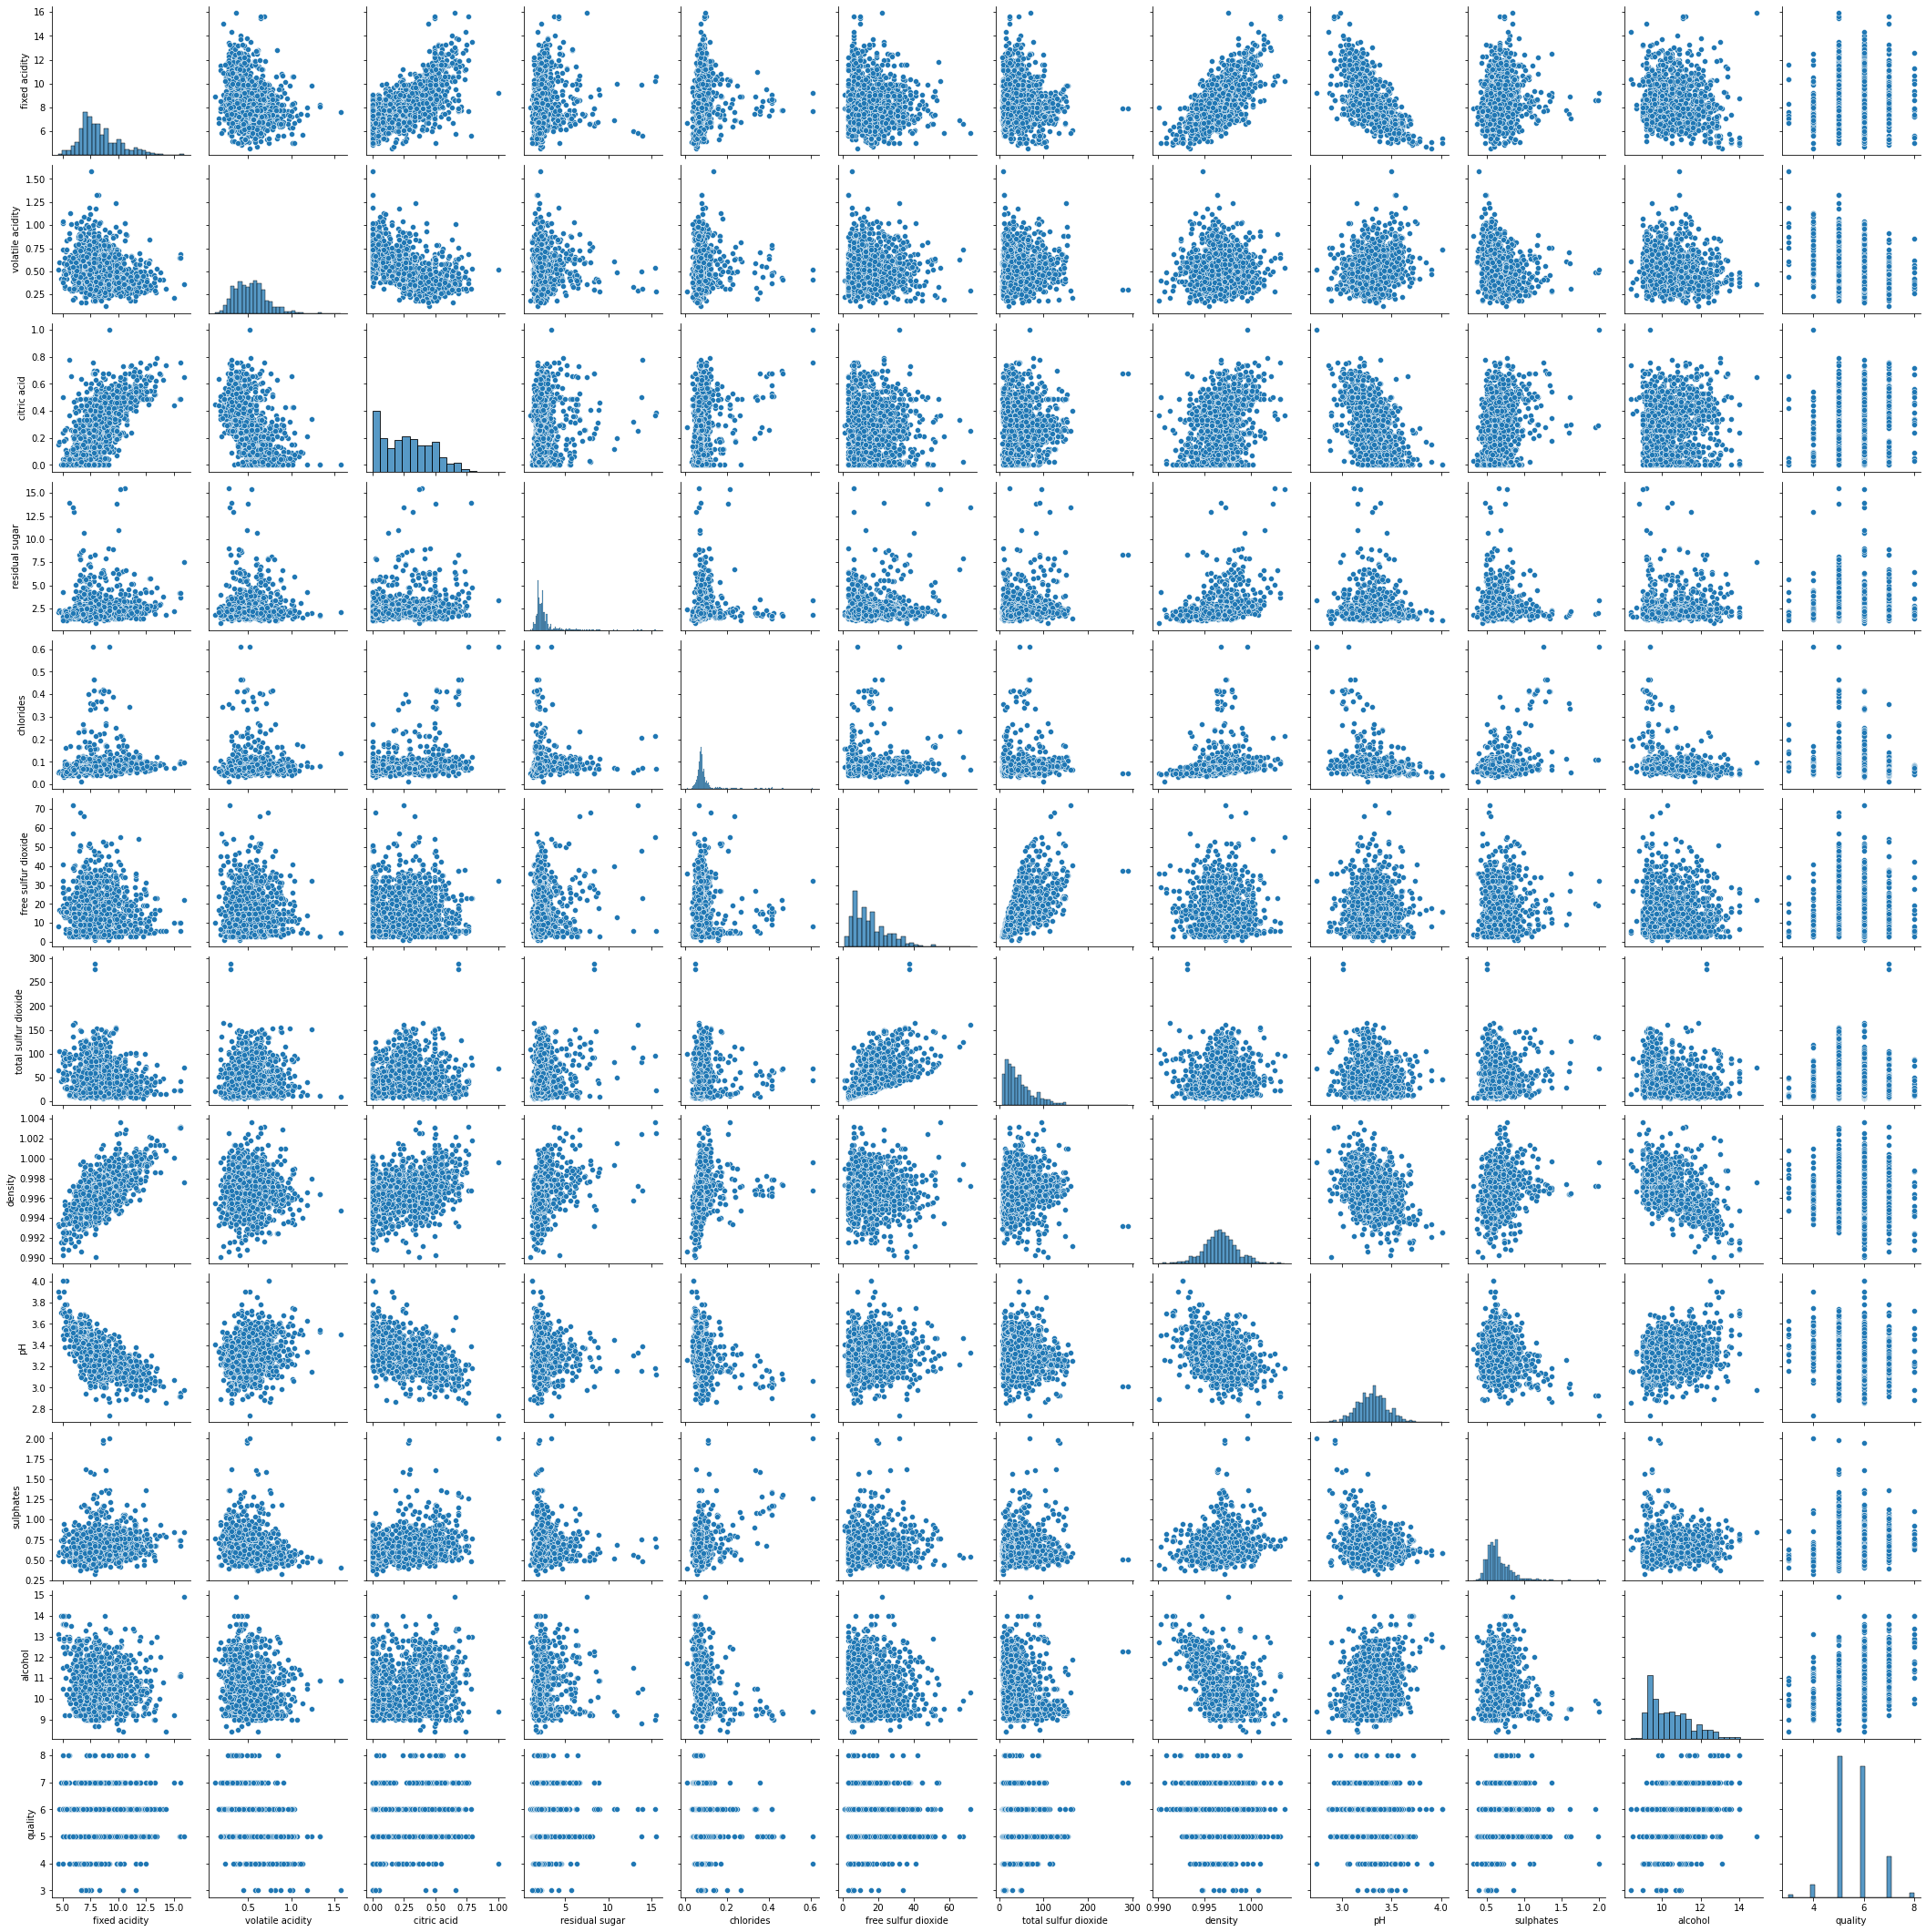

In [9]:
#visualiza graficamente a correlação das colunas
sns.pairplot(Red)
plt.show()

## Regressão Linear da base de vinho tinto

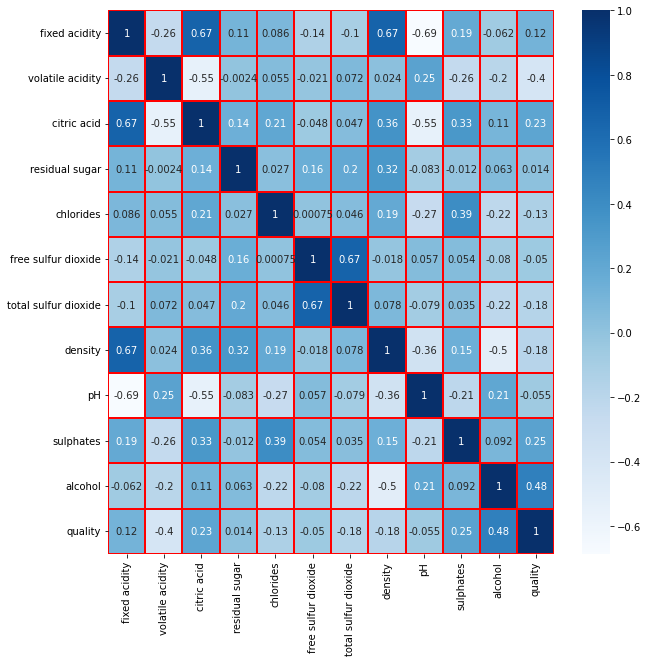

In [134]:
#Visualizando a correlação entre as colunas, extrai-se do heatmap que a qualidade tem correlação grande com o teor alcólico
# do vinho.
plt.figure(figsize = (10,10))
sns.heatmap(Red.corr(), cmap='Blues', linecolor='red', linewidths=0.2, annot = True)
plt.show()

In [98]:
#Preparando os dados para modelagem regressão linear
X = Red.drop(['quality'], axis = 1)
y = Red['quality']

In [99]:
# Separação do dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42, 
                                                    stratify=y)

In [100]:
#Normalização dos dados
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [101]:
#Iniciando 
model = LinearRegression()
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)

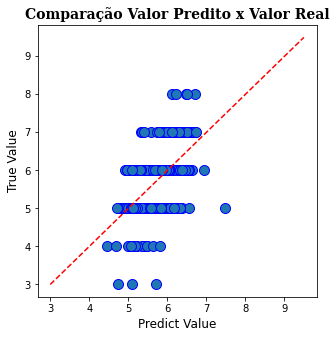

In [102]:
# Comparando valores reais com os preditos
fig = plt.figure(figsize=(5,5))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontdict={'family': 'serif',                                                            
                                                              'weight': 'bold',
                                                              'size': 14})
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# plotando os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show()

In [128]:
# Cálculo do R2 score
R2 = r2_score(y_test, y_pred)

print(f'R2 = {R2}')

R2 = 0.34935799819959124


## Regressão Logística da base de vinho tinto

In [124]:
#Preparando os dados para regressão logística
red = pd.read_csv('../datasets/winequality-red.csv', sep=';')
red = red.drop_duplicates()


In [125]:
#Criando uma nova coluna qualidade para classificar bom e ruim
red.loc[red["quality"] < 6, 'qualidade'] = 0
red.loc[red["quality"] >= 6, 'qualidade'] = 1
red_logistic = red.drop(['quality'], axis = 1)

In [126]:
red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  qualidade  
0      9.4        5        0.0  
1      9.8        5        0.0  
2      9.8        5        0.0  
3      9.8        6        1.0  
5      9.4        5        0.0

In [127]:
#comparando em percentual para saber se usamos stratfy
red_logistic['qualidade'].value_counts(normalize=True)

1.0    0.529065
0.0    0.470935
Name: qualidade, dtype: float64

In [21]:
red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  qualidade  
0      9.4        5        0.0  
1      9.8        5        0.0  
2      9.8        5        0.0  
3      9.8        6        1.0  
5      9.4        5        0.0

In [22]:
#dropando a coluna qualidade para fazer treino e test
X = red_logistic.select_dtypes(include = [np.number]).drop(columns = "qualidade")
y = red_logistic['qualidade']

In [23]:
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
5      9.4

In [24]:
#Separação para treino e test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42, 
                                                    stratify=y)

In [25]:
#normalizando as variáveis
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [26]:
#Iniciando treino
model = LogisticRegression()
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)

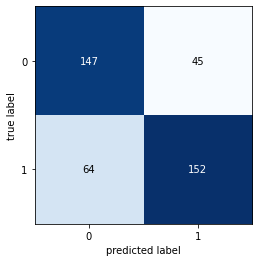

In [27]:
# Criando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)
plt.show()

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.77      0.73       192
         1.0       0.77      0.70      0.74       216

    accuracy                           0.73       408
   macro avg       0.73      0.73      0.73       408
weighted avg       0.74      0.73      0.73       408



In [29]:
print('Precision Score: %.2f' % precision_score(y_test, y_pred))

Precision Score: 0.77


# Vinho Branco

### Realizando análise do Vinho branco

In [30]:
#Lendo a base
white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [31]:
#Verificando nulos e ou str
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [32]:
# Retirando dados duplicados do dataset
White = white.drop_duplicates()
White

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
6               6.2              0.32         0.16             7.0      0.045   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
6                    30.0                 136.0  0.99490  3.18       0.47   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
6         9.6        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[3961 rows x 12 columns]

In [33]:
#Verificando as métricas do dataset
White.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3961.000000       3961.000000  3961.000000     3961.000000   
mean        6.839346          0.280538     0.334332        5.914819   
std         0.866860          0.103437     0.122446        4.861646   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.600000   
50%         6.800000          0.260000     0.320000        4.700000   
75%         7.300000          0.330000     0.390000        8.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3961.000000          3961.000000           3961.000000  3961.000000   
mean      0.045905            34.889169            137.193512     0.993790   
std       0.023103            17.210021             43.129065     0.002905   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.035000            23.000000            106.000000     0.991620   
50%       0.042000            33.000000            133.000000     0.993500   
75%       0.050000            45.000000            166.000000     0.995710   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  3961.000000  3961.000000  3961.000000  3961.000000  
mean      3.195458     0.490351    10.589358     5.854835  
std       0.151546     0.113523     1.217076     0.890683  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.480000    10.400000     6.000000  
75%       3.290000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

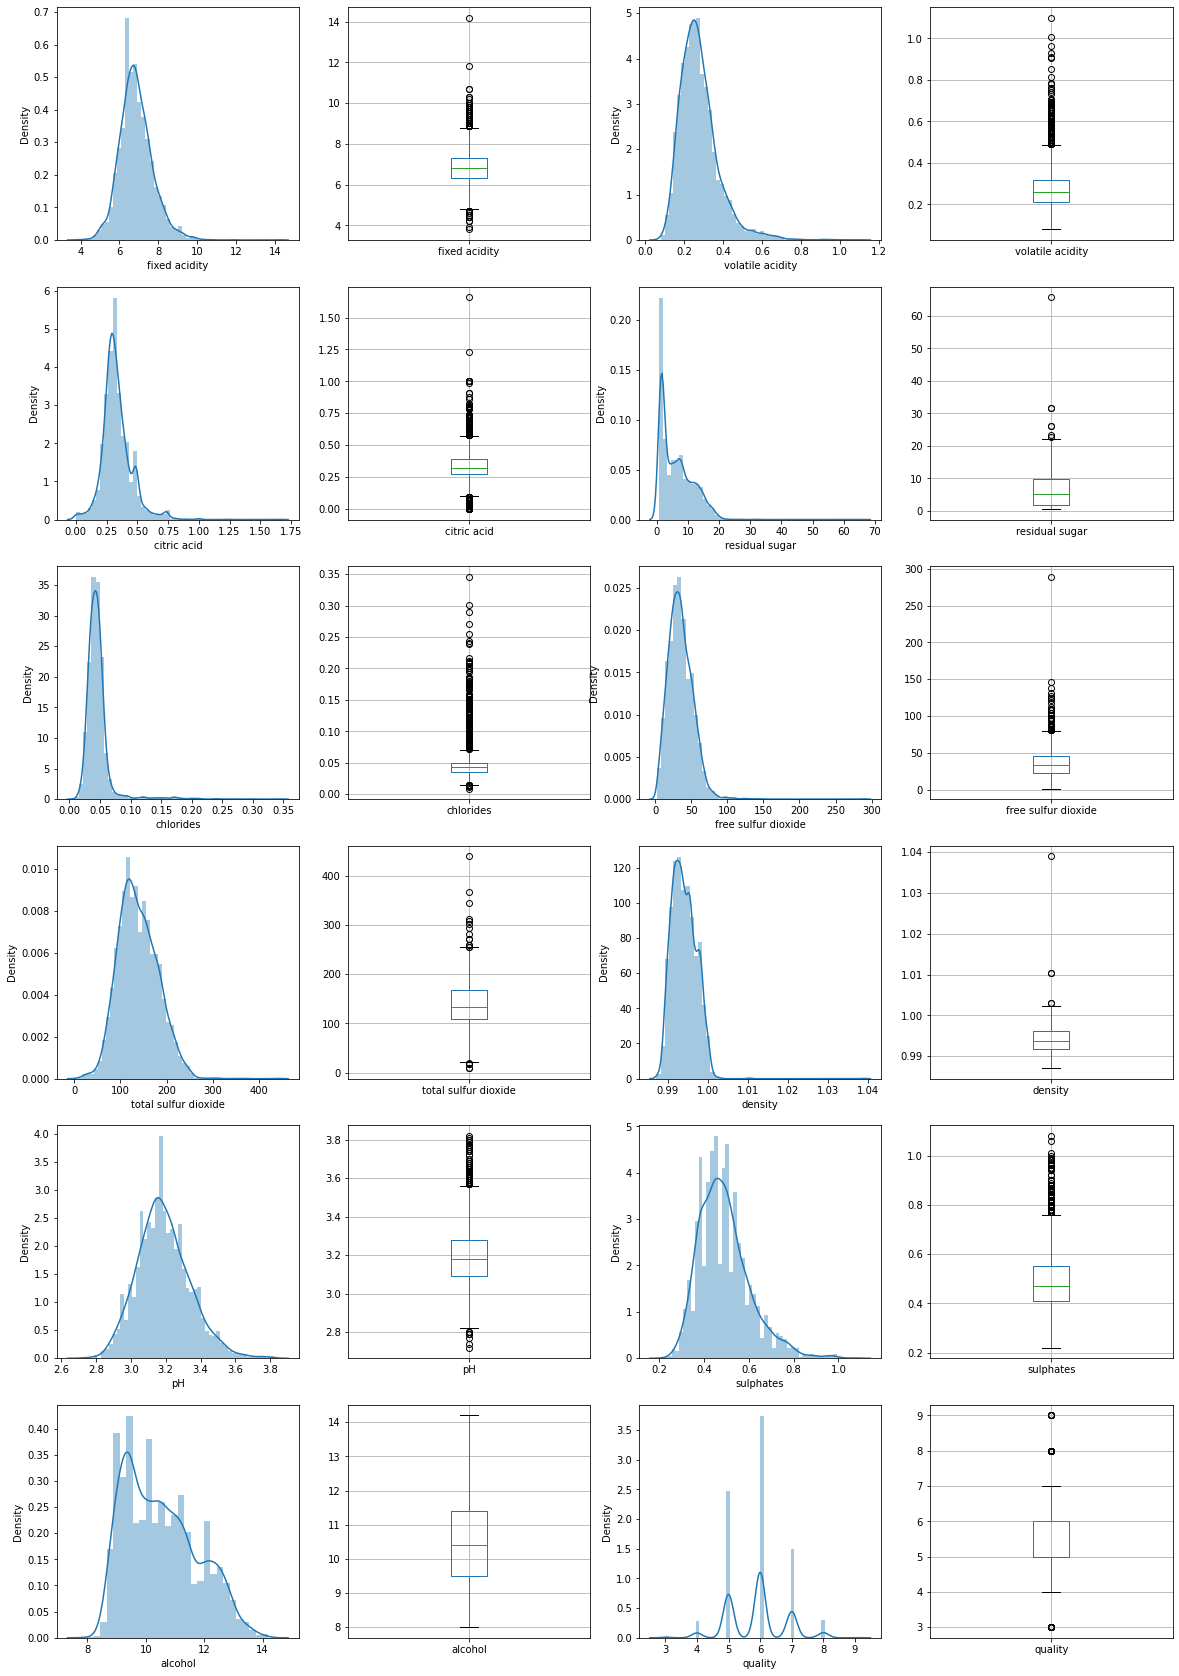

In [34]:
#Gerando grafico com loop para visualizar o impacto de outliers ea curva pela densidade.

fig, ax = plt.subplots(6, 4, figsize=(20, 30))
ax = ax.flatten()
columns = white.columns

for i, col in enumerate(columns):
    sns.distplot(white[col], ax=ax[i+i])
    white.boxplot(col, ax=ax[i+1+i])
    #print()
plt.show()

<AxesSubplot:xlabel='quality', ylabel='count'>

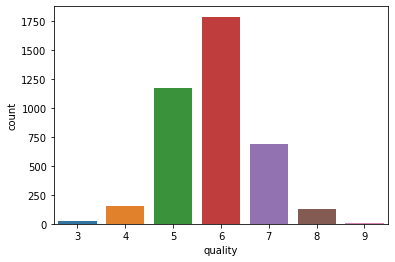

In [35]:
# visualizando graficamente a coluna 'quality'
sns.countplot(x='quality', data = White)

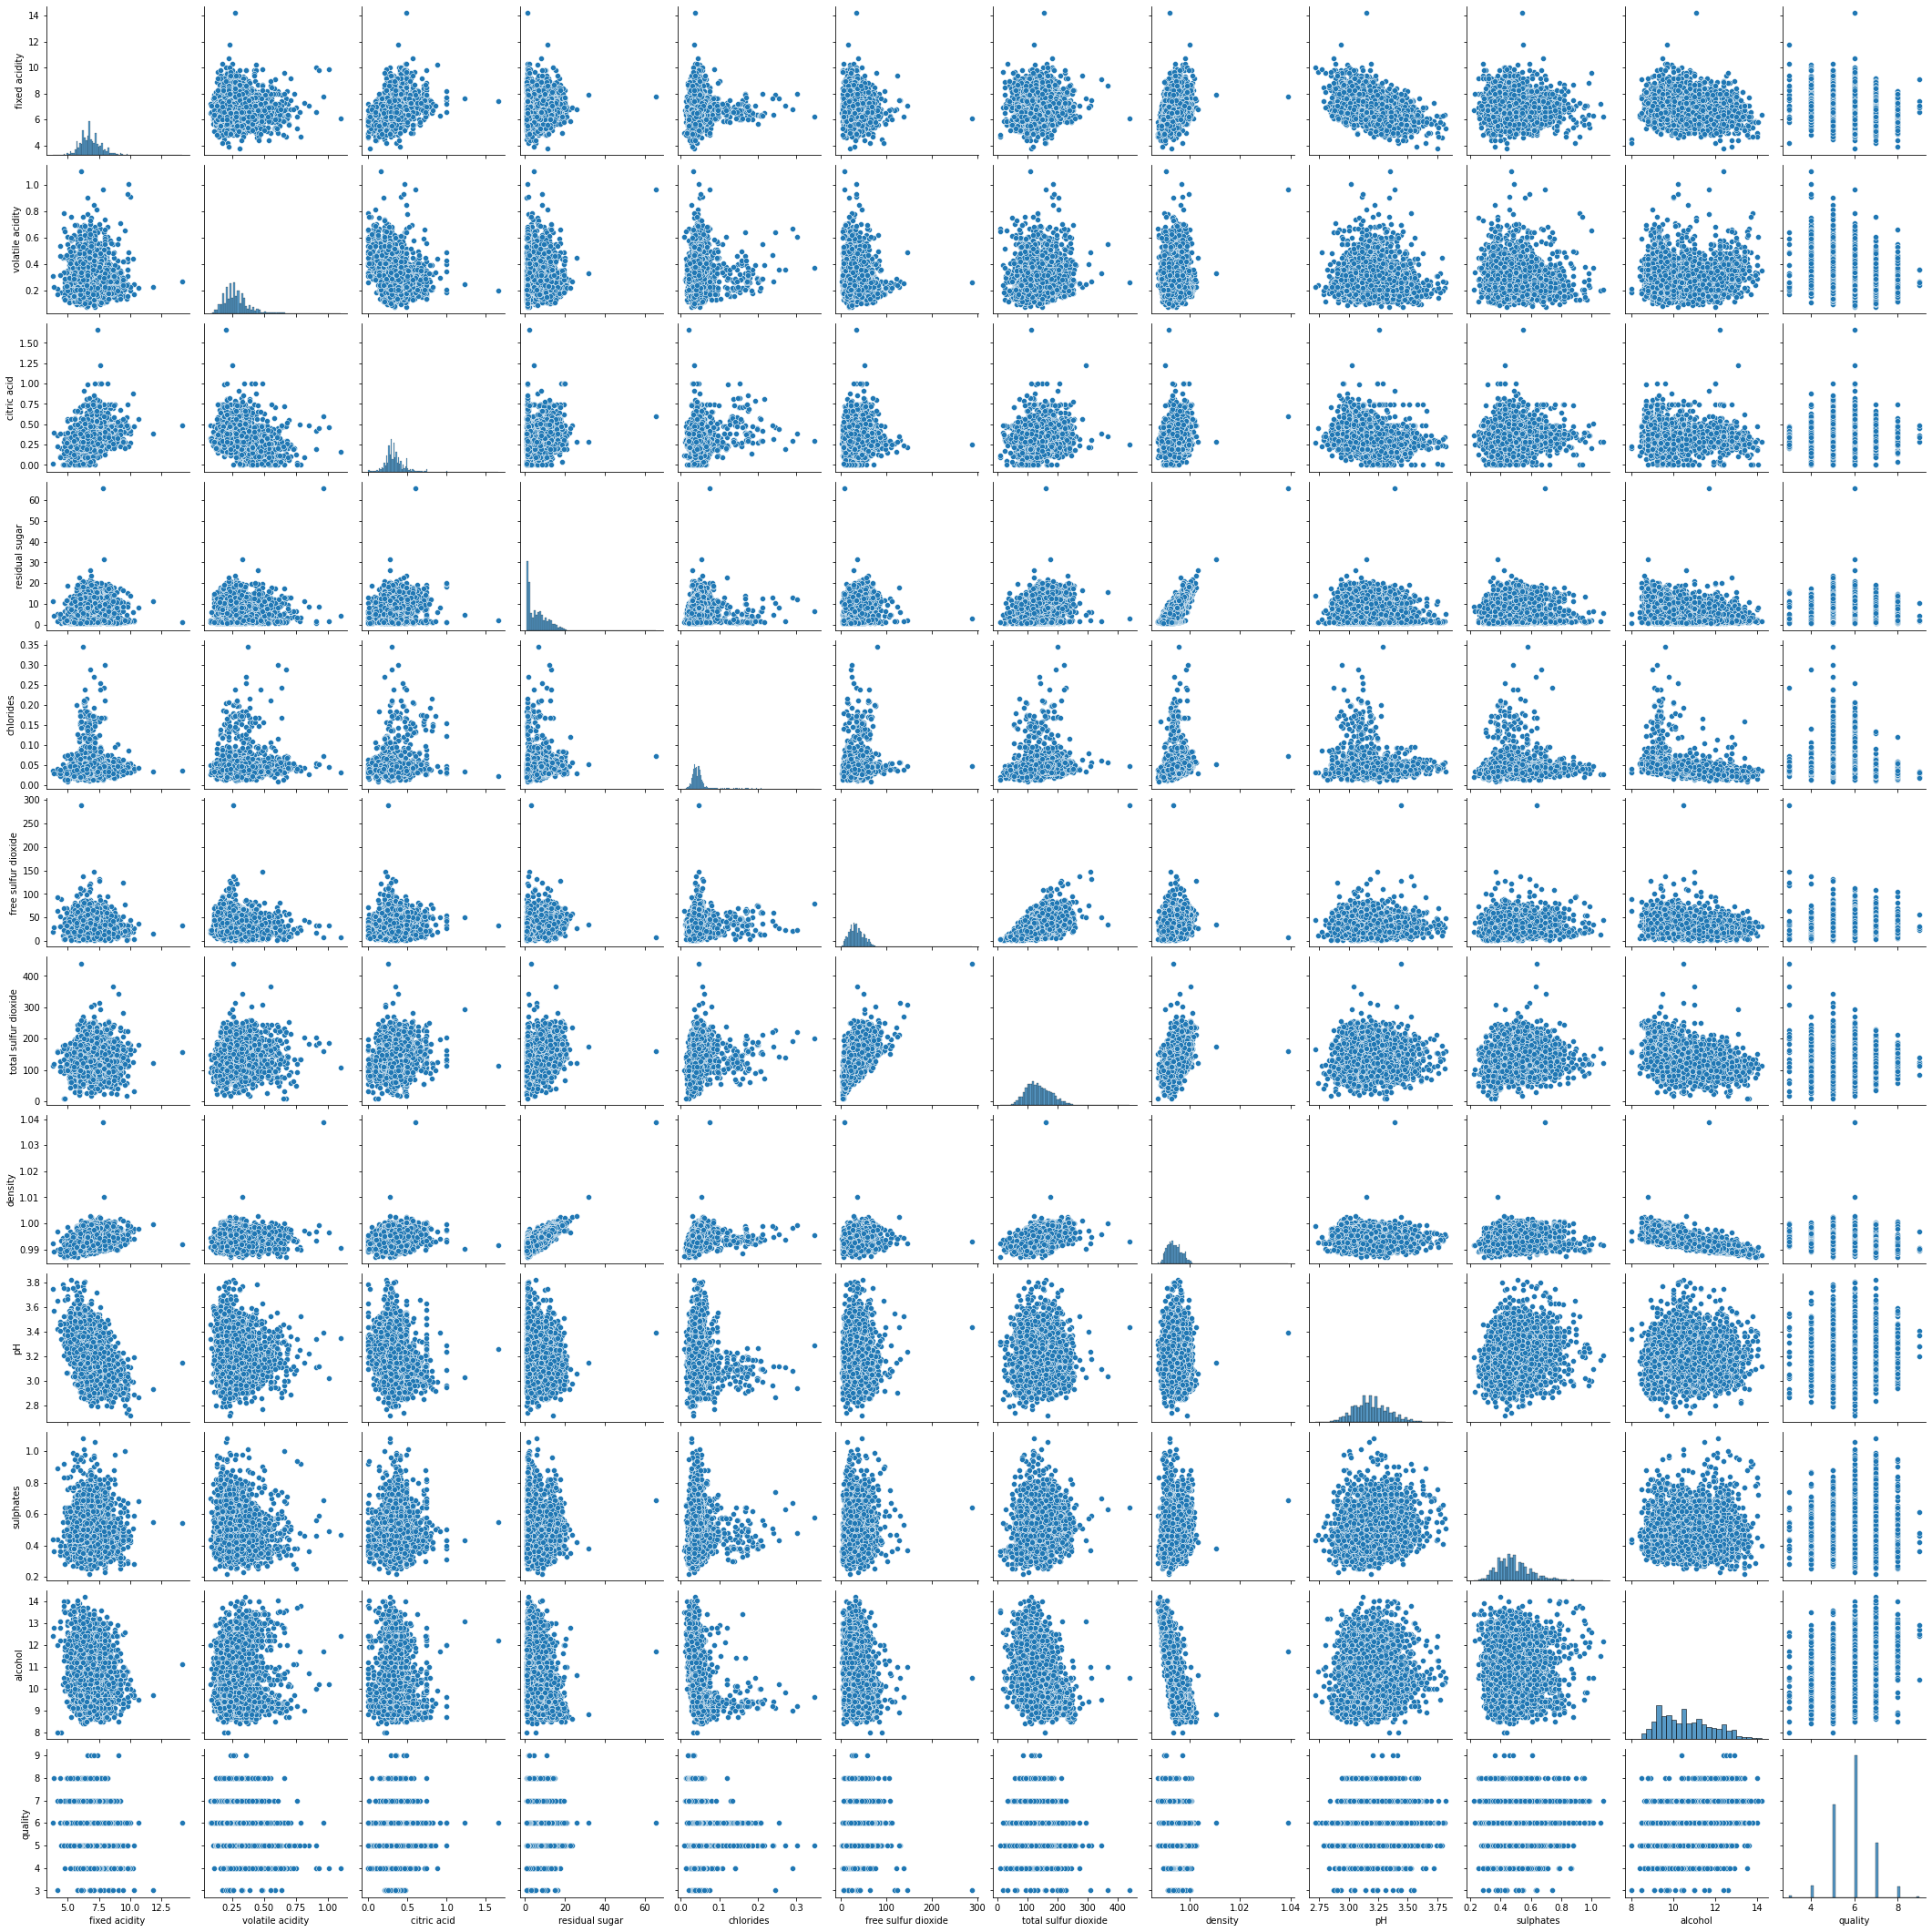

In [36]:
#visualiza graficamente a correlação das colunas, percebe-se que os valores não são lineares
sns.pairplot(White)
plt.show()


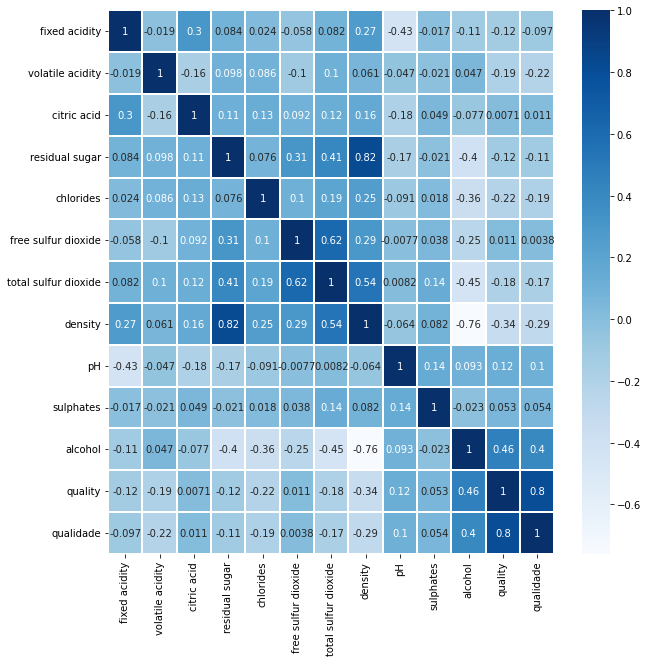

In [132]:
#Visualizando a correlação entre as colunas, extrai-se do heatmap que a qualidade tem correlação grande com o teor alcólico
# do vinho.
plt.figure(figsize = (10,10))
sns.heatmap(White.corr(), annot = True, cmap="Blues", linecolor="white", linewidths=0.2)
plt.show()

## Regressão Linear da base de vinho branco

In [38]:
#Preparando os dados para modelagem
X = White.drop(['quality'], axis = 1)
y = White['quality']

In [39]:
#conferindo se retirou o quality
X

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
6               6.2              0.32         0.16             7.0      0.045   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
6                    30.0                 136.0  0.99490  3.18       0.47   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  
0         8.8  
1         9.5  
2        10.1  
3         9.9  
6         9.6  
...       ...  
4893     11.2  
4894      9.6  
4895      9.4  
4896     12.8  
4897     11.8  

[3961 rows x 11 columns]

In [40]:
# Separação do dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)


In [41]:
#Normalização dos dados
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [42]:
#Iniciando 
model = LinearRegression()
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
y_pred

array([6.46659318, 6.63926005, 5.53857794, ..., 5.20268594, 5.27012322,
       7.00889675])

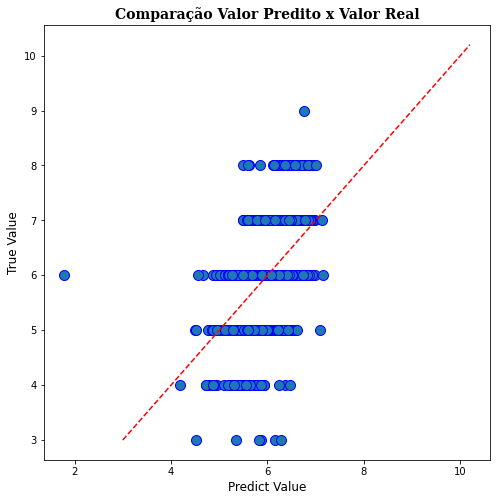

In [43]:
# Comparando o target original com o predito
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontdict={'family': 'serif',
                                                             'weight': 'bold',
                                                             'size': 14})
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show()

In [44]:
# Cálculo do R2 score
R2 = r2_score(y_test, y_pred)

print(f'R2 = {R2}')

R2 = 0.2826650734489965


## Regressão Logística da base de vinho branco

In [45]:
#Preparando os dados para regressão logística
White = pd.read_csv('../datasets/winequality-white.csv', sep=';')
White = white.drop_duplicates()

In [46]:
# Classificando o vinho como bom (qualidade 0) ou ruim (qualidade 1), através da coluna quality
White.loc[White['quality']  < 6, 'qualidade'] = 0
White.loc[White['quality'] >= 6, 'qualidade'] = 1
White_logistic = White.drop(['quality'], axis = 1)

C:\Users\wiltd\AppData\Local\Temp\ipykernel_6164\2965969783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  White.loc[White['quality']  < 6, 'qualidade'] = 0


In [47]:
White.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
6            6.2              0.32         0.16             7.0      0.045   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
6                 30.0                 136.0   0.9949  3.18       0.47   

   alcohol  quality  qualidade  
0      8.8        6        1.0  
1      9.5        6        1.0  
2     10.1        6        1.0  
3      9.9        6        1.0  
6      9.6        6        1.0

In [48]:
#comparando em percentual para saber se usamos stratfy
White_logistic['qualidade'].value_counts(normalize=True)

1.0    0.659682
0.0    0.340318
Name: qualidade, dtype: float64

In [49]:
#Analisando a amostra pela quantificação da qualidade
White_logistic['qualidade'].value_counts()

1.0    2613
0.0    1348
Name: qualidade, dtype: int64

In [50]:
#dropando a coluna qualidade para fazer treino e test
X = White_logistic.select_dtypes(include = [np.number]).drop(columns = "qualidade")
y = White_logistic['qualidade']

In [51]:
#Separando a base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)


In [52]:
#normalizando as variáveis
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [53]:
#Iniciando treino
model = LogisticRegression()
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)

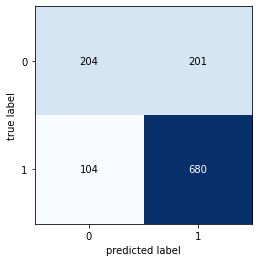

In [54]:
# Criando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)
plt.show()

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.66      0.50      0.57       405
         1.0       0.77      0.87      0.82       784

    accuracy                           0.74      1189
   macro avg       0.72      0.69      0.69      1189
weighted avg       0.73      0.74      0.73      1189



In [56]:
print('Precision Score: %.2f' % precision_score(y_test, y_pred))

Precision Score: 0.77


# Vinho branco e tinto

In [141]:
#Juntando as bases dos vinhos branco e tinto para análise
red = pd.read_csv('../datasets/winequality-red.csv', sep=';')
white = pd.read_csv('../datasets/winequality-white.csv', sep=';')
wines= pd.concat([red, white], ignore_index = True)
wines

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
6492     11.2        6  
6493      9.6        5  
6494      9.4        6  
6495     12.8        7  
6496     11.8        6  

[6497 rows x 12 columns]

In [142]:
Wines = wines.drop_duplicates()
Wines

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
5               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
5         9.4        5  
...       ...      ...  
6492     11.2        6  
6493      9.6        5  
6494      9.4        6  
6495     12.8        7  
6496     11.8        6  

[5318 rows x 12 columns]

In [143]:
# Analisando as informações do dataset
Wines.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5318 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5318 non-null   float64
 1   volatile acidity      5318 non-null   float64
 2   citric acid           5318 non-null   float64
 3   residual sugar        5318 non-null   float64
 4   chlorides             5318 non-null   float64
 5   free sulfur dioxide   5318 non-null   float64
 6   total sulfur dioxide  5318 non-null   float64
 7   density               5318 non-null   float64
 8   pH                    5318 non-null   float64
 9   sulphates             5318 non-null   float64
 10  alcohol               5318 non-null   float64
 11  quality               5318 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 540.1 KB


In [144]:
# Verifica-se que o dataset não contém dados nulos
Wines.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [145]:
#Verificando as métricas do dataset
Wines.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5318.000000       5318.000000  5318.000000     5318.000000   
mean        7.215523          0.344171     0.318522        5.049605   
std         1.319777          0.168264     0.147177        4.500645   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.800000   
50%         7.000000          0.300000     0.310000        2.700000   
75%         7.700000          0.410000     0.400000        7.500000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5318.000000          5318.000000           5318.000000  5318.000000   
mean      0.056700            30.030463            114.107747     0.994536   
std       0.036865            17.804365             56.783848     0.002966   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            16.000000             74.000000     0.992200   
50%       0.047000            28.000000            116.000000     0.994660   
75%       0.066000            41.000000            153.750000     0.996770   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  5318.000000  5318.000000  5318.000000  5318.000000  
mean      3.224639     0.533402    10.549222     5.795600  
std       0.160403     0.149753     1.185964     0.879715  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.400000     6.000000  
75%       3.330000     0.600000    11.400000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

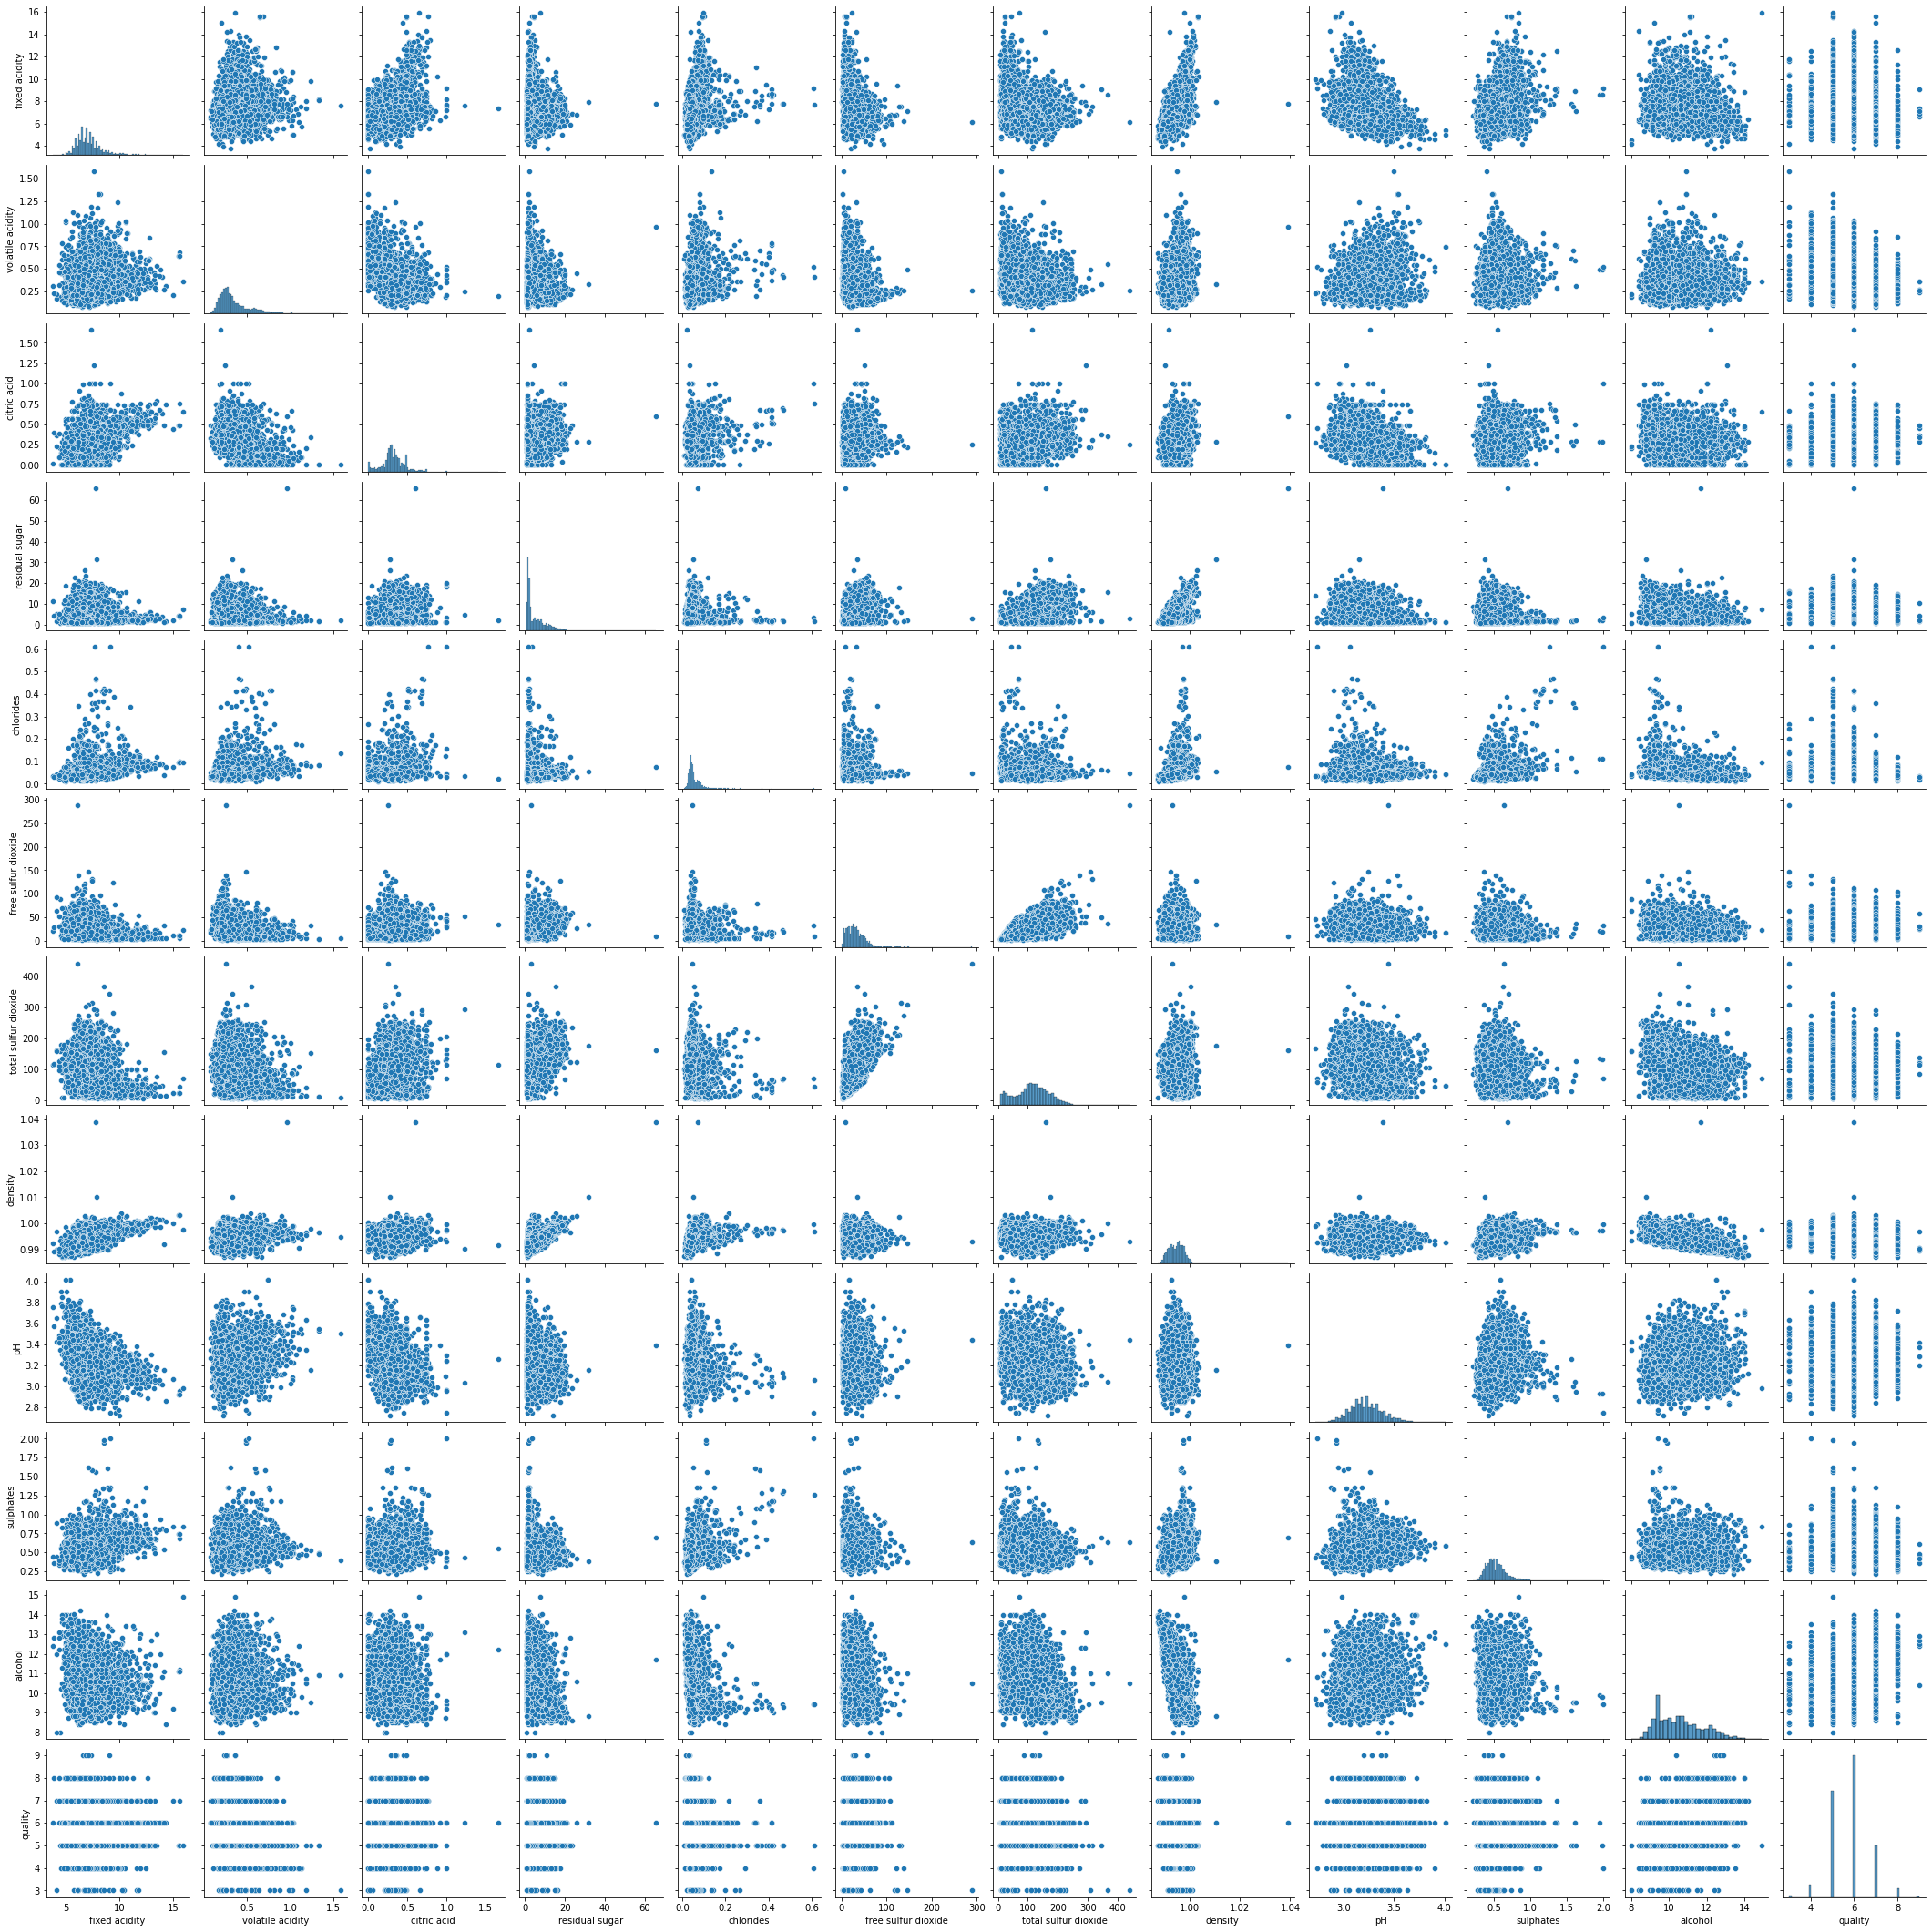

In [62]:
#visualizando graficamente a correlação das colunas, percebe-se que os valores não são lineares
sns.pairplot(Wines)
plt.show()

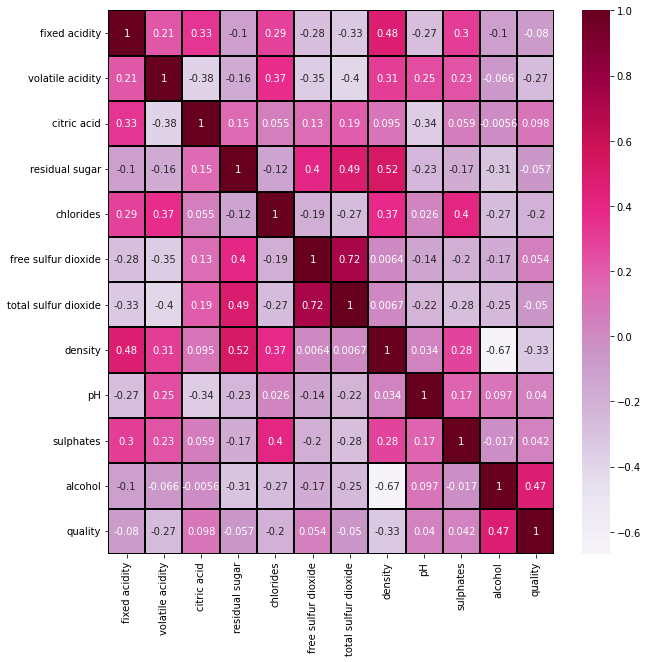

In [146]:
#Visualizando a correlação entre as colunas, extrai-se do heatmap que a qualidade tem correlação grande com o teor alcólico
# do vinho.
plt.figure(figsize = (10,10))
sns.heatmap(Wines.corr(), annot = True, cmap="PuRd", linecolor="Black", linewidths=0.2)
plt.show()


# Regressão Linear

In [147]:
#Preparando os dados para modelagem
X = Wines.drop(['quality'], axis = 1)
y = Wines['quality']

In [148]:
#Conferindo se a feature quality foi retirada
X

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
5               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
5         9.4  
...       ...  
6492     11.2  
6493      9.6  
6494      9.4  
6495     12.8  
6496     11.8  

[5318 rows x 11 columns]

In [149]:
# Separação do dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)


In [150]:
#Normalização dos dados
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [151]:
#Iniciando 
model = LinearRegression()
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)

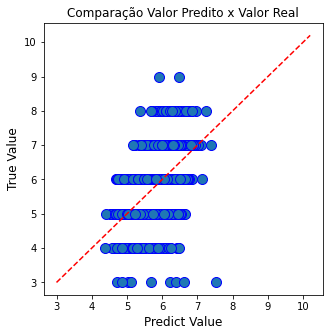

In [152]:
# Comparando valores reais com os preditos
fig = plt.figure(figsize=(5,5))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show()

In [153]:
# Cálculo do R2 score
R2 = r2_score(y_test, y_pred)


print(f'R2 = {R2}')


R2 = 0.2906084299186148


# Regressão Logística

In [154]:
# Preparando a base para regressão logística
red = pd.read_csv('../datasets/winequality-red.csv', sep=';')
white = pd.read_csv('../datasets/winequality-white.csv', sep=';')
wines= pd.concat([red, white], ignore_index = True)

In [155]:
#Removendo duplicados
Wines = wines.drop_duplicates()

In [156]:
#Criando uma nova coluna qualidade para classificar bom e ruim
Wines.loc[Wines['quality'] < 6, 'qualidade'] = 0
Wines.loc[Wines['quality'] >= 6, 'qualidade'] = 1
Wines_logistic = Wines.drop(['quality'], axis = 1)

C:\Users\wiltd\AppData\Local\Temp\ipykernel_6164\2944813365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wines.loc[Wines['quality'] < 6, 'qualidade'] = 0


In [157]:
#Analisando as proporções da amostra pela qualidade
Wines_logistic['qualidade'].value_counts(normalize=True)

1.0    0.626363
0.0    0.373637
Name: qualidade, dtype: float64

In [158]:
#preparando a base para regressão
X = Wines_logistic.select_dtypes(include = [np.number]).drop(columns = "qualidade")
y = Wines_logistic['qualidade']


In [159]:
# Separação do dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

In [160]:
#Normalização dos dados
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [161]:
#Iniciando treino
model = LogisticRegression()
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)

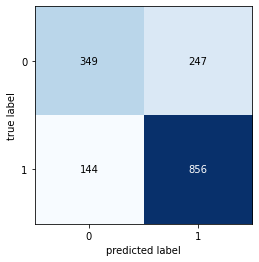

In [162]:
# Criando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)
plt.show()

In [163]:
#Calculando a acurácia
print(accuracy_score(y_test, y_pred))

0.7550125313283208


In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.59      0.64       596
         1.0       0.78      0.86      0.81      1000

    accuracy                           0.76      1596
   macro avg       0.74      0.72      0.73      1596
weighted avg       0.75      0.76      0.75      1596



In [82]:
# Calculando a precisão
print('Precision Score: %.2f' % precision_score(y_test, y_pred))

Precision Score: 0.78


# Métricas para análise dos Resultados do Dataframes de vinho tinto e branco

In [83]:
# Vinho Tinto - métricas

#Regressão linear
# R2 = 0.34

#Regressão logisitica
# acuracia = 0.73
# precisão = 0.77

# pela analise de dados a regressão logistica tem um melhor encaixe pois tras melhor analize 

In [84]:
# Vinho Branco - métricas
# R2 = 0.28
# Acurácia = 0.74# Vinho Branco - métricas

#Regressão linear
# R2 = 0.28

#Regressão logisitica
# Acurácia = 0.74
# Precisão = 0.77

# pela analise de dados a regressão logistica tem um melhor encaixe pois tras melhor analize 
# Precisão = 0.77

In [85]:
# Vinhos tinto e branco

#Regressão linear
# R2 = 0.29

#Regressão logisitica
# Acurácia = 0.76
# Precisão = 0.78


# agora com os 2 base de dados vimos que quanto mais dados nesta tabela melhor fica a acuracia e precisão
# e aparentemente quanto maior nossa base de dados melhor vai ser a precisão.
